In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import nltk

In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv("C:\\Users\\mohan\\Downloads\\slash mark\\Restaurant reviews.csv")

In [4]:
data


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


In [5]:
data = data.drop(columns=['Reviewer', 'Rating','Metadata','Time','Pictures','7514'])

In [6]:
data

,Restaurant,Review
0,Beyond Flavours,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...
...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...
9996,Chinese Pavilion,This place has never disappointed us.. The foo...
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ..."
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...


In [7]:
positive_words = ['good', 'great', 'excellent', 'amazing', 'nice', 'love', 'wonderful', 'best', 'fantastic', 'perfect','outstanding']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'worst', 'hate', 'poor', 'disappointing', 'dreadful', 'horrendous']

def label_sentiment(review):
    if isinstance(review, str):
        review = review.lower()
        pos_count = sum([1 for word in positive_words if word in review])
        neg_count = sum([1 for word in negative_words if word in review])
        
        if pos_count > neg_count:
            return 'positive'
        elif neg_count > pos_count:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'

# Apply sentiment labeling
data['sentiment'] = data['Review'].apply(label_sentiment)


print("Labeled Data:\n", data.head())


Labeled Data:
         Restaurant                                             Review  \
0  Beyond Flavours  The ambience was good, food was quite good . h...   
1  Beyond Flavours  Ambience is too good for a pleasant evening. S...   
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...   
4  Beyond Flavours  Food is good.we ordered Kodi drumsticks and ba...   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


In [8]:
data

,Restaurant,Review,sentiment
0,Beyond Flavours,"The ambience was good, food was quite good . h...",positive
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,positive
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,positive
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,positive
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,positive
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,positive
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,neutral
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",neutral
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,positive


In [9]:
# Split data
X = data['Review'].fillna('')
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction and model training
vectorizer = CountVectorizer(max_features=5000) 
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_counts, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Evaluate the model
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 92.10%

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.79      0.82       177
     neutral       0.86      0.85      0.85       525
    positive       0.96      0.97      0.96      1298

    accuracy                           0.92      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.92      0.92      0.92      2000



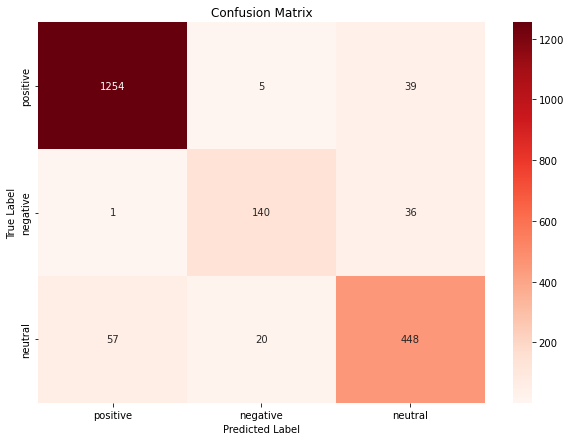

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'neutral'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Predict sentiment for user input
def predict_sentiment(review):
    review_counts = vectorizer.transform([review])
    prediction = model.predict(review_counts)
    return prediction[0]

while True:
    user_review = input("Enter a review to analyze sentiment (or type 'exit' to quit): ")
    if user_review.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_review)
    print(f"The sentiment of the review is: {sentiment}")

Enter a review to analyze sentiment (or type 'exit' to quit): the food is good
The sentiment of the review is: positive
Enter a review to analyze sentiment (or type 'exit' to quit): the food is worst
The sentiment of the review is: negative
Enter a review to analyze sentiment (or type 'exit' to quit): the food is good but the serive is bad
The sentiment of the review is: neutral
Enter a review to analyze sentiment (or type 'exit' to quit): exit
